## Web Scraping and EDA

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
#import dependencies/ packages
import requests
from bs4 import BeautifulSoup

import pandas as pd
import numpy as np
import datetime
import pickle

#import libraries for plotting
import seaborn as sns
import matplotlib.pyplot as plt

#show plots into jupyter notebook
%matplotlib inline
%config InlineBackend.figure_format = 'svg' #to fix blurry text on plots

#set default theme for plotting
sns.set_context("notebook")
sns.set_style("darkgrid")

#set max number of columns to be displayed
pd.set_option('display.max_columns', 50)

#### Scrap data from url

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
#preview the review list
reviews[0]

"✅ Trip Verified |  Came from Glasgow to London and took connecting flight American Airlines from London to North Carolina. It's my third day here in North Carolina and still waiting for my luggage. They didn't even bother to transfer the luggage to connecting flight. Luggage are still in Glasgow. "

In [4]:
#convert to dataframe
df = pd.DataFrame(reviews)
df.head()

,0
0,✅ Trip Verified | Came from Glasgow to London...
1,✅ Trip Verified | My flight on on 12 May 2023...
2,Not Verified | Cairo is a 5 hour flight and B...
3,✅ Trip Verified | After travelling London to ...
4,✅ Trip Verified | My luggage was mis-tagged i...


In [5]:
# split column into trip_status and reviews
df_reviews = pd.DataFrame()
df_reviews['trip_status'] = df[0].str.split('|',1).str[0]
df_reviews['review'] = df[0].str.split('|',1).str[1]

<ipython-input-5-a1a1bb8a8473>:3: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df_reviews['trip_status'] = df[0].str.split('|',1).str[0]
<ipython-input-5-a1a1bb8a8473>:4: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df_reviews['review'] = df[0].str.split('|',1).str[1]


In [6]:
df_reviews.head()

,trip_status,review
0,✅ Trip Verified,Came from Glasgow to London and took connect...
1,✅ Trip Verified,My flight on on 12 May 2023 got delayed an h...
2,Not Verified,Cairo is a 5 hour flight and BA considers it...
3,✅ Trip Verified,After travelling London to Madrid with Briti...
4,✅ Trip Verified,My luggage was mis-tagged in Dallas on my wa...


#### EDA for reviews

In [7]:
# concise summary of dataframes using info() method--
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   trip_status  1000 non-null   object
 1   review       1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [8]:
# check for number of unique records
df_reviews['review'].nunique()

1000

In [9]:
#check for nulls in data
df_reviews.isnull().sum()

trip_status    0
review         0
dtype: int64

-- There are no nulls in the sample data

In [10]:
#check how many reviews are for Not verfied trips
num_not_verified = df_reviews[df_reviews['trip_status'].str.contains('Not Verified')]['trip_status'].count()

df_stats = pd.DataFrame(columns=['trip_status','%age'],
             data= [('Not_verified',num_not_verified/len(reviews)*100),
                   ('Verfied',(len(reviews)-num_not_verified)/len(reviews)*100 )
                   ]
             )

df_stats.head()

,trip_status,%age
0,Not_verified,19.8
1,Verfied,80.2


-- of 1000 sample reviews, 198 are for not verified trips

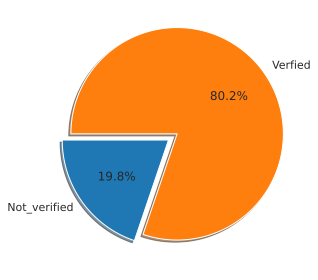

In [11]:
# create pie plot for trip_status distribution
labels = df_stats['trip_status']
sizes = df_stats['%age']

explode = (0, 0.1)

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=180)
plt.show()

#### Analyzing text statistics
will include:
- word frequency analysis,
- sentence length analysis,
- average word length analysis,

<Axes: title={'center': 'word count'}, ylabel='Frequency'>

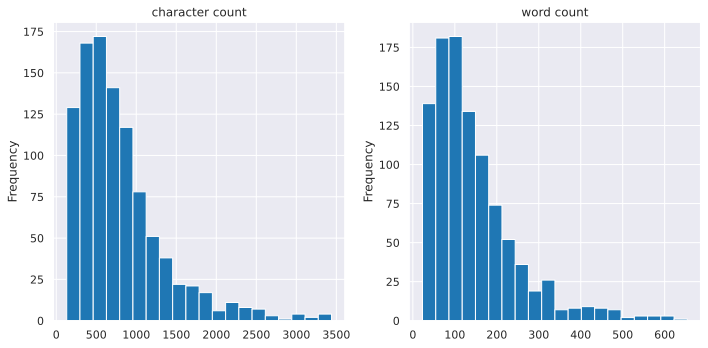

In [12]:
# number of characters and number of words appearing in each review
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(10,5),tight_layout=True)
ax1.set_ylabel('num of reviews')
ax1.set_title('character count')
ax2.set_ylabel('num of reviews')
ax2.set_title('word count')
# character count per review
df_reviews['review'].str.len().plot(kind='hist', ax=ax1, bins=20)
# word count per review
df_reviews['review'].str.split().map(lambda x: len(x)).plot(kind='hist', ax=ax2, bins=20)


-- majority of the reviews are 500 to 700 characters or about 100 words

<Axes: ylabel='Frequency'>

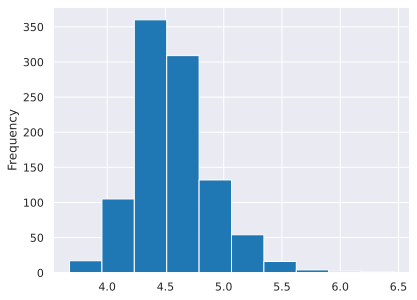

In [13]:
# average word length in each sentence.
df_reviews['review'].str.split().\
                    apply(lambda x : [len(i) for i in x]).\
                    map(lambda x: np.mean(x)).\
                    plot(kind='hist')

The average word length ranges between 4 to 6 with 4.5 being the most common length. Does it mean that people are using really short words in reviews?Let’s find out.

In [15]:
# Analyzing the amount and the types of stopwords
import nltk
from nltk.corpus import names, stopwords, words
stop=set(stopwords.words('english'))

Text(0.5, 1.0, 'Stopwords frequency')

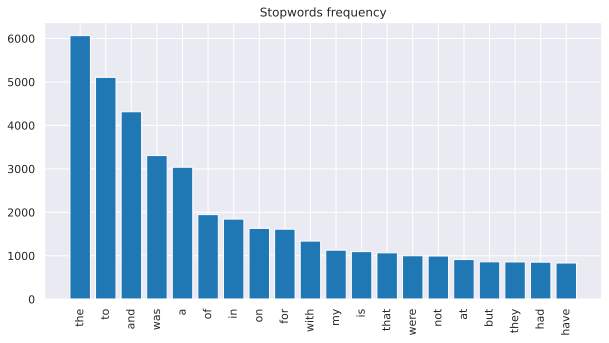

In [31]:
corpus = []
review = df_reviews['review'].str.split()
review = review.values.tolist()
corpus = [word for i in review for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
#get the top 20 frequent stopwords
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:20]

# frequency plot
x,y=zip(*top)
plt.figure(figsize=(10,5))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.title("Stopwords frequency")

-- We can evidently see that stopwords such as "the",“to”,”and” and “was” dominate in reviews

So now we know which stopwords occur frequently in our reviews, let’s inspect which words other than these stopwords occur frequently.

In [40]:
len(most)

13886

<Axes: >

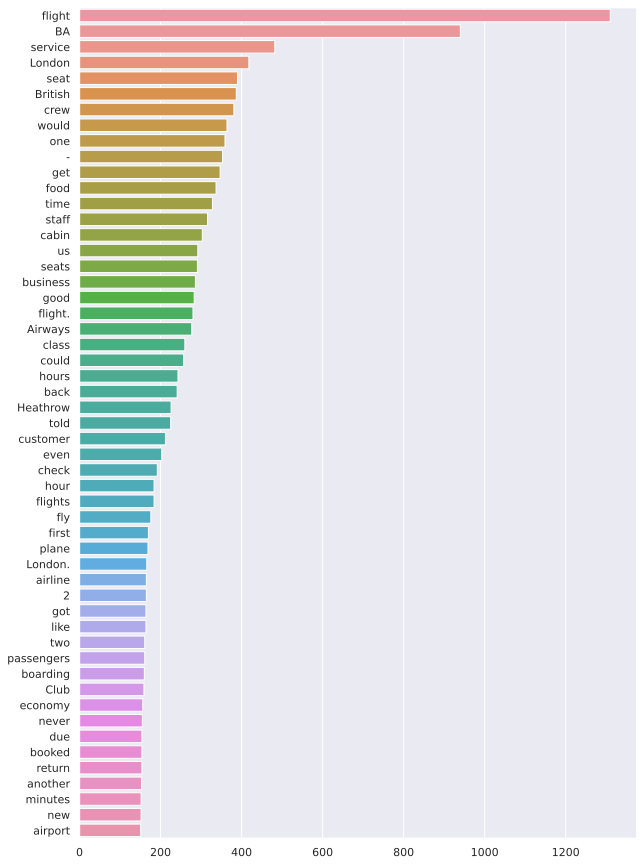

In [48]:
from collections import  Counter
counter=Counter(corpus)
most=counter.most_common()
x, y=[], []
for word,count in most:
    if (word.lower() not in stop and count>150):
        x.append(word)
        y.append(count)
plt.figure(figsize=(10,15))
sns.barplot(x=y,y=x)

-- words like "flight", "London", "US", "Service","crew", "staff", "seat","food" stands out
infering most of the reviews are related to London-US flight, with feedback about staff/crew, service, food and seat

In [ ]:
# create word cloud
British Airways Data Science virtual experience programme